<a href="https://colab.research.google.com/github/olesk75/adventures-in-machine-learning/blob/main/Tensorflow_MNIST_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Load the TensorBoard notebook extension - for later experiements
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [14]:
import tensorflow as tf
import numpy as np
import keras
from keras.utils.vis_utils import plot_model
from IPython.display import Image 

In [15]:
print(tf.__version__)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else: 
  print('Found GPU at: {}'.format(device_name))

2.4.0
Found GPU at: /device:GPU:0


In [16]:
# The famous MNIST dataset of 28x28 images hand-written digits (0-9)
mnist = tf.keras.datasets.mnist

In [17]:
# x_train, x_test: uint8 28x28 arrays of grayscale image data with shapes (num_samples, 28, 28).
# y_train, y_test: uint8 arrays of digit labels (integers in range 0-9) with shapes (num_samples,).
 
 
 # First training data, then test data
 # Training data is essentially example hand-written digits (x_train) in image arrays,
 # and which number each image corresponds to in the y_train array.
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [18]:
# Attempts at manually flattening
#Flatten the input 
#X = X.reshape(X.shape[0], 28*28)
#x_train.reshape(x_train[0], 28*28)
#x_test.reshape(x_test[0], 28*28)
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)


In [19]:
# We have 0-255 values and need 0.0-1.0 so we normalize
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

### Model construction

In [20]:
# Sequential means we have a feedforward neural network (connections between the nodes do not form a cycle)
model = tf.keras.models.Sequential()

In [21]:
# Adds a model that reduces 28x28 2D arrays to single 1D array in out INPUT layer
# (we could've used numpy or anything else for this)
model.add(tf.keras.layers.Flatten()) # This should give us a single 784 element array (28x28)

# densely-connected NN layer with 128 neurons in a layer
# activation function is the function that makes the layer fire
# tf.nn.relu is the standard default activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# densely-connected NN layer with 128 neurons in a layer
# activation function is the function that makes the layer fire
# tf.nn.relu is the standard default activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# densely-connected OUTPUT layer with 128 neurons in a layer
# activation function is the function that makes the layer fire
# tf.nn.relu is the standard default activation function
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [22]:
# Note that the NN will always optmize for minimum loss
# adam is the default go-to optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [23]:
# Running the model three times
model.fit(x_train, y_train, epochs=3)

# As the model could overfit (just memorize every sample instead of creating general rules), we must check
val_loss, val_acc = model.evaluate(x_test, y_test)

print(f'Evaluated loss: {val_loss}\nEvaluated accuracy: {val_acc}')

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4637 - accuracy: 0.8672
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1149 - accuracy: 0.9657
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0904 - accuracy: 0.9733
Evaluated loss: 0.09040454775094986
Evaluated accuracy: 0.9732999801635742


In [24]:
# Here we save the trained model
model.save('basic_tester_mnist.model')
# Then, for testing, we load the  trained model
new_model = tf.keras.models.load_model('basic_tester_mnist.model')

INFO:tensorflow:Assets written to: basic_tester_mnist.model/assets


In [25]:
# We now use the model we loaded back in to find predictions for the sample dataset x_test
# Returns array for each element with predictions for each digit (0-9)
predictions = new_model.predict(x_test)

# Finding the strongest prediction for the second element (a badly written 2)
best_match = np.argmax(predictions[1])
print(f'Best match for our badly written 2 is: {best_match}')

Best match for our badly written 2 is: 2


Adding a visualization

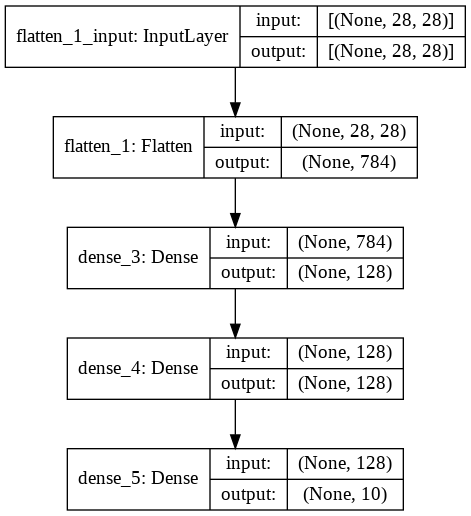

In [26]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image('model.png')